# **Reading the California fertility clinic data file**

In [5]:
# path of the file
myfile=r'C:/2. Spring 2023/Python/5 EDA Group/'

In [6]:
# import pandas
import pandas as pd

# read excell file using pandas
clinic = pd.read_excel(myfile + 'floods.xlsx')
list(clinic)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/2. Spring 2023/Python/5 EDA Group/floods.xlsx'

# **1) Checking whether there is any null value/missing data**

In [3]:
# data overview

clinic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ClinicID     71 non-null     int64  
 1   Address      71 non-null     object 
 2   Long         71 non-null     float64
 3    Lat         71 non-null     float64
 4   State Code   71 non-null     int64  
 5   County Code  71 non-null     int64  
 6   Tract Code   71 non-null     int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 4.0+ KB


In [4]:
clinic.head(71)

,ClinicID,Address,Long,Lat,State Code,County Code,Tract Code
0,325,"11370 ANDERSON ST, LOMA LINDA, CA, 92354",-117.261140,34.047215,6,71,7302
1,468,"100 PARK PL, SAN RAMON, CA, 94583",-121.990890,37.772377,6,13,345202
2,318,"101 ROWLAND WAY, NOVATO, CA, 94945",-122.558784,38.096916,6,41,101200
3,101,"1060 MARSH RD, MENLO PARK, CA, 94025",-122.184875,37.479930,6,81,611700
4,136,"10921 WILSHIRE BLVD, LOS ANGELES, CA, 90024",-118.444580,34.058598,6,37,265202
...,...,...,...,...,...,...,...
66,521,"1 Daniel Burnham Ct, SAN FRANCISCO, CA, 94109",37.786755,-122.422491,6,6075,15100
67,524,"1195 W. Fremont Ave, PALO ALTO, CA, 94087",37.353110,-122.062431,6,6085,510001
68,84,"477 N. El Camino Real, ENCINITAS, CA, 92024",33.057114,-117.261477,6,6073,17108
69,198,"203 N. Brea Blvd, BREA, CA, 92821",33.921864,-117.897953,6,6059,1503


In [5]:
#Column Selection
clinic['Long']

0    -117.261140
1    -121.990890
2    -122.558784
3    -122.184875
4    -118.444580
         ...    
66     37.786755
67     37.353110
68     33.057114
69     33.921864
70     33.851956
Name: Long, Length: 71, dtype: float64

In [6]:
clinic['State Code']

0     6
1     6
2     6
3     6
4     6
     ..
66    6
67    6
68    6
69    6
70    6
Name: State Code, Length: 71, dtype: int64

In [7]:
clinic['Address']

0          11370 ANDERSON ST, LOMA LINDA, CA, 92354
1                 100 PARK PL, SAN RAMON, CA, 94583
2                101 ROWLAND WAY, NOVATO, CA, 94945
3              1060 MARSH RD, MENLO PARK, CA, 94025
4       10921 WILSHIRE BLVD, LOS ANGELES, CA, 90024
                          ...                      
66    1 Daniel Burnham Ct, SAN FRANCISCO, CA, 94109
67        1195 W. Fremont Ave, PALO ALTO, CA, 94087
68      477 N. El Camino Real, ENCINITAS, CA, 92024
69                203 N. Brea Blvd, BREA, CA, 92821
70    510 N. Prospect Ave, REDONDO BEACH, CA, 90277
Name: Address, Length: 71, dtype: object

In [8]:
clinic[' Lat']

0      34.047215
1      37.772377
2      38.096916
3      37.479930
4      34.058598
         ...    
66   -122.422491
67   -122.062431
68   -117.261477
69   -117.897953
70   -118.378629
Name:  Lat, Length: 71, dtype: float64

**Findings: No null/missing values.But there are discrepencies in the latitudes (some are positive) and longitudes (some are negative).**

# Fixing the Problem of Fipping the Lat & Long

In [54]:
myfile=r'C:/2. Spring 2023/Python/5 EDA Group/'
clinic = pd.read_excel(myfile + 'ARTClinicData_GISClass_CAOnly.xlsx')

# Check if latitude and longitude are flipped
flip_mask = clinic['Long'] > clinic[' Lat']

# Swap latitude and longitude values where they are flipped
clinic.loc[flip_mask, ['Long', ' Lat']] = clinic.loc[flip_mask, [' Lat', 'Long']].values

# Write the updated dataframe to a new Excel file
clinic.to_excel('Downloads/fixed_file.xlsx', index=False)

In [56]:
newfile=r'C:/2. Spring 2023/Python/5 EDA Group/'
cor_clinic = pd.read_excel(newfile + 'fixed_file.xlsx')
clinic.head(71)

,ClinicID,Address,Long,Lat,State Code,County Code,Tract Code
0,325,"11370 ANDERSON ST, LOMA LINDA, CA, 92354",-117.261140,34.047215,6,71,7302
1,468,"100 PARK PL, SAN RAMON, CA, 94583",-121.990890,37.772377,6,13,345202
2,318,"101 ROWLAND WAY, NOVATO, CA, 94945",-122.558784,38.096916,6,41,101200
3,101,"1060 MARSH RD, MENLO PARK, CA, 94025",-122.184875,37.479930,6,81,611700
4,136,"10921 WILSHIRE BLVD, LOS ANGELES, CA, 90024",-118.444580,34.058598,6,37,265202
...,...,...,...,...,...,...,...
66,521,"1 Daniel Burnham Ct, SAN FRANCISCO, CA, 94109",-122.422491,37.786755,6,6075,15100
67,524,"1195 W. Fremont Ave, PALO ALTO, CA, 94087",-122.062431,37.353110,6,6085,510001
68,84,"477 N. El Camino Real, ENCINITAS, CA, 92024",-117.261477,33.057114,6,6073,17108
69,198,"203 N. Brea Blvd, BREA, CA, 92821",-117.897953,33.921864,6,6059,1503


# **2) Checking the DUPLICATION**

In [9]:
clinic['Address'].value_counts()

18370 BURBANK BLVD, TARZANA, CA, 91356           2
10921 WILSHIRE BLVD, LOS ANGELES, CA, 90024      2
2581 SAMARITAN DR, SAN JOSE, CA, 95124           1
536 E ARRELLAGA ST, SANTA BARBARA, CA, 93103     1
500 SUPERIOR AVE, NEWPORT BEACH, CA, 92663       1
                                                ..
3720 LOMITA BLVD, TORRANCE, CA, 90505            1
39141 CIVIC CENTER DR, FREMONT, CA, 94538        1
444 SAN VICENTE BLVD, LOS ANGELES, CA, 90048     1
4835 VAN NUYS BLVD, SHERMAN OAKS, CA, 91403      1
510 N. Prospect Ave, REDONDO BEACH, CA, 90277    1
Name: Address, Length: 69, dtype: int64

**Findings: So, we have two same address with different clinic ID in the dataset.**

In [10]:
clinic['Long'].value_counts()

-118.534590    2
-118.444580    2
-121.950600    1
-119.703560    1
-117.934720    1
              ..
-118.348816    1
-121.977930    1
-118.375670    1
-118.448700    1
 33.851956     1
Name: Long, Length: 69, dtype: int64

In [11]:
clinic[' Lat'].value_counts()

 34.172188     2
 34.058598     2
 37.252960     1
 34.432720     1
 33.624930     1
              ..
 33.814860     1
 37.555100     1
 34.070312     1
 34.158540     1
-118.378629    1
Name:  Lat, Length: 69, dtype: int64

**Findings: We have same longitude and latitude with different clinic ID in the dataset.**

# **3) Checking some statistics of the data**

In [12]:
clinic['Long'].mean()

-89.30566091549294

In [13]:
clinic['Long'].median()

-118.396034

In [14]:
clinic['Long'].mode()

0   -118.53459
1   -118.44458
dtype: float64

In [15]:
clinic['Long'].std()

61.65389120558073

In [16]:
clinic[' Lat'].mean()

5.0115926619718305

In [17]:
clinic[' Lat'].median()

34.067833

In [18]:
clinic[' Lat'].mode()

0    34.058598
1    34.172188
dtype: float64

In [19]:
clinic[' Lat'].std()

61.687489879558896

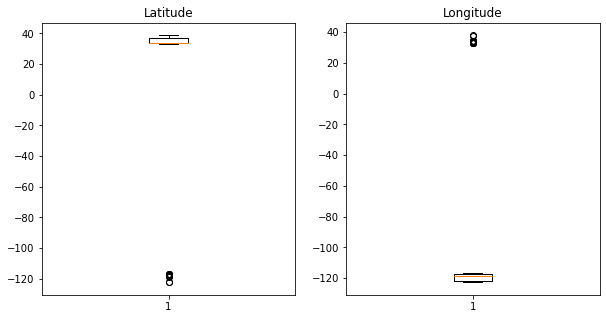

In [20]:
#Plotting the data in boxplot

import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
axs[0].boxplot(clinic[' Lat'])
axs[0].set_title('Latitude')
axs[1].boxplot(clinic['Long'])
axs[1].set_title('Longitude')
plt.show()

**Findings: Data are non-parametric, as mean, median, mode are different. And there are some extreme outliers of latitude and longitude in the dataset.**

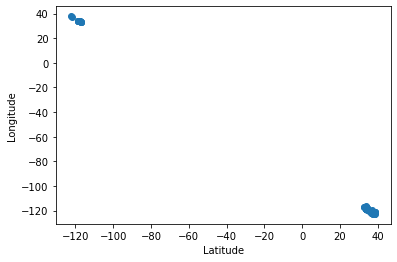

In [21]:
#creating a scatterplot to double check the resuslts above

plt.scatter(clinic[' Lat'], clinic['Long'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

**There is something wrong with these two datasets.**

#  So, we have to take decision about the same addresses as we have to locate the clinics spatially. Also, we have to make corrections in the data of latitude and longitude as some latitude are of negative values and some logtitude are of positive values. In addition, we have to decide whether we are going to keep the outliers or not. Outliers may influence the results of this analysis.